## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_2/solution.ipynb).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
student_df.isnull().sum()/student_df.isnull().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

**1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?**

In [21]:
student_df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [22]:
student_df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [23]:
student_df.groupby("parental level of education").mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


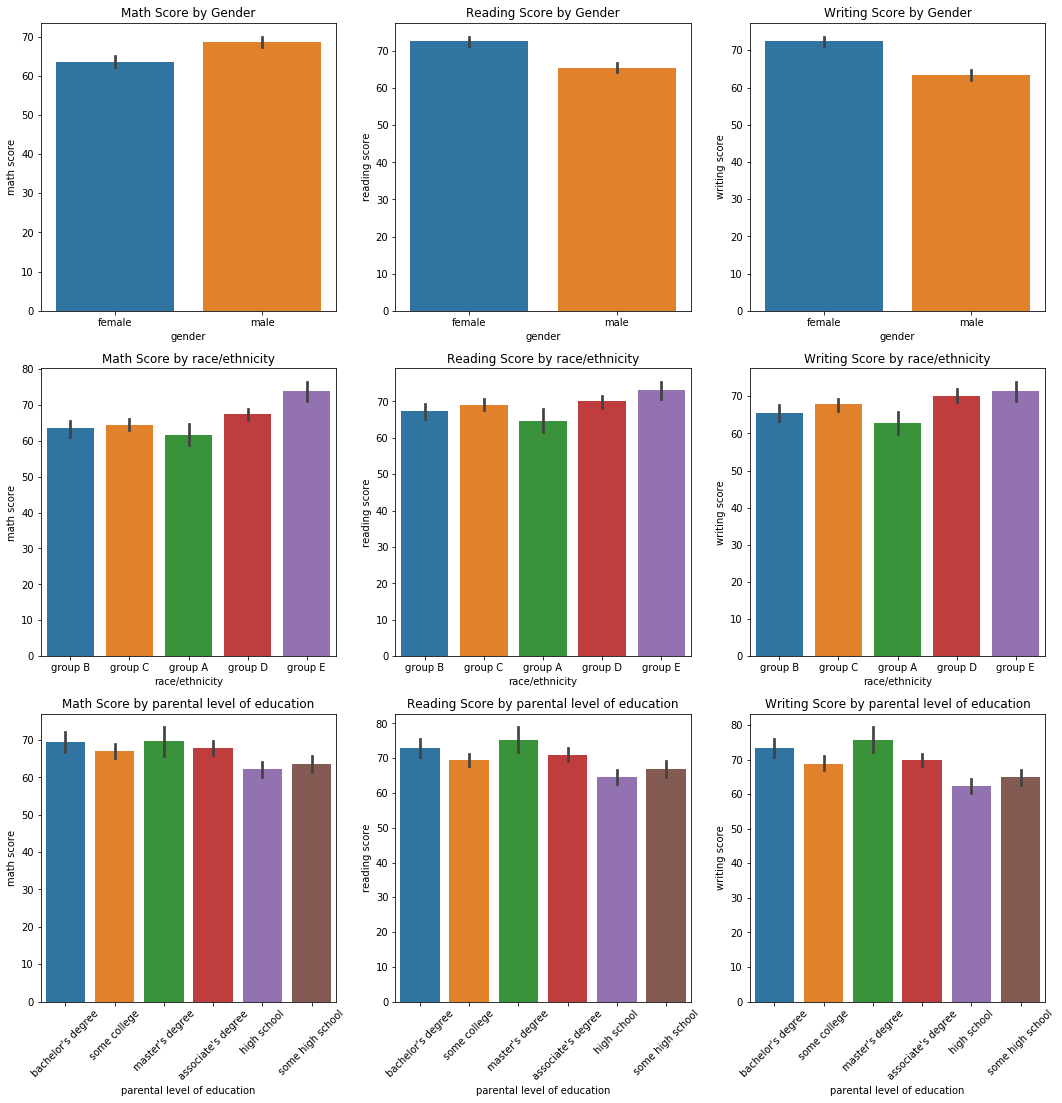

In [20]:
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
sns.barplot(student_df['gender'], student_df['math score'])
plt.title('Math Score by Gender')

plt.subplot(3,3,2)
sns.barplot(student_df['gender'], student_df['reading score'])
plt.title('Reading Score by Gender')

plt.subplot(3,3,3)
sns.barplot(student_df['gender'], student_df['writing score'])
plt.title('Writing Score by Gender')

plt.subplot(3,3,4)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.title('Math Score by race/ethnicity')

plt.subplot(3,3,5)
sns.barplot(student_df['race/ethnicity'], student_df['reading score'])
plt.title('Reading Score by race/ethnicity')

plt.subplot(3,3,6)
sns.barplot(student_df['race/ethnicity'], student_df['writing score'])
plt.title('Writing Score by race/ethnicity')

plt.subplot(3,3,7)
sns.barplot(student_df['parental level of education'], student_df['math score'])
plt.title('Math Score by parental level of education')
plt.xticks(rotation=45)

plt.subplot(3,3,8)
sns.barplot(student_df['parental level of education'], student_df['reading score'], )
plt.title('Reading Score by parental level of education')
plt.xticks(rotation=45)

plt.subplot(3,3,9)
sns.barplot(student_df['parental level of education'], student_df['writing score'], )
plt.title('Writing Score by parental level of education')
plt.xticks(rotation=45)

plt.show()

As we can see, averages decrease as the grade lowers. **However, visualizing differences is not a formal way of stating that there are significant differences across categories!** For this, we need to use a proper statistical test, such as a t-test or ANOVA. So, let's use the t-test to learn whether the differences are statistically significant:

In [24]:
# Test whether group differences in gender are significant.
gender = student_df["gender"].unique()
grouped_df = student_df.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                student_df[student_df["gender"]==gender[i]][var], 
                student_df[student_df["gender"]==gender[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


It appears that females are better at reading and writing exams and males are better at math exams

In [36]:
# Test whether group differences in race/ethnicity are significant.
ethnicity = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicity)):
        for j in range(i+1, len(ethnicity)):
            print("t-test between groups {0} and {1}:".format(ethnicity[i], ethnicity[j]))
            print(stats.ttest_ind(
                student_df[student_df["race/ethnicity"]==ethnicity[i]][var], 
                student_df[student_df["race/ethnicity"]==ethnicity[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


Taking into account the t statistics, there are significant differences except between the groups A, B and C.

In [26]:
# Test whether group differences in parental level of education are significant.
lvl_education = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lvl_education)):
        for j in range(i+1, len(lvl_education)):
            print("t-test between groups {0} and {1}:".format(lvl_education[i], lvl_education[j]))
            print(stats.ttest_ind(
                student_df[student_df["parental level of education"]==lvl_education[i]][var], 
                student_df[student_df["parental level of education"]==lvl_education[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

There are significant differences between a lot of groups, with the largest between masters and high school

**Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?**

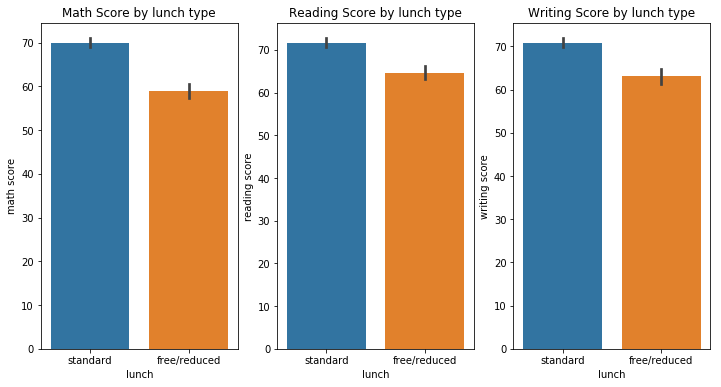

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.barplot(student_df['lunch'], student_df['math score'])
plt.title('Math Score by lunch type')

plt.subplot(1,3,2)
sns.barplot(student_df['lunch'], student_df['reading score'])
plt.title('Reading Score by lunch type')

plt.subplot(1,3,3)
sns.barplot(student_df['lunch'], student_df['writing score'])
plt.title('Writing Score by lunch type')

plt.show()

In [29]:
# Test whether group differences in parental level of education are significant.
lunch = student_df["lunch"].unique()
grouped_df = student_df.groupby("lunch")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunch)):
        for j in range(i+1, len(lunch)):
            print("t-test between groups {0} and {1}:".format(lunch[i], lunch[j]))
            print(stats.ttest_ind(
                student_df[student_df["lunch"]==lunch[i]][var], 
                student_df[student_df["lunch"]==lunch[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


statistically significant - possibly those that are provided free/reduced lunches have parents that are not at home in the evening to do homework with students and studies are not a priority

**Does the test preparation course seem to have an effect on the exam performances?**

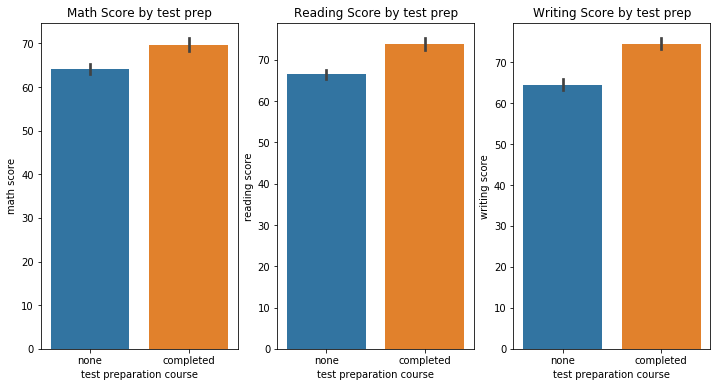

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.barplot(student_df['test preparation course'], student_df['math score'])
plt.title('Math Score by test prep')

plt.subplot(1,3,2)
sns.barplot(student_df['test preparation course'], student_df['reading score'])
plt.title('Reading Score by test prep')

plt.subplot(1,3,3)
sns.barplot(student_df['test preparation course'], student_df['writing score'])
plt.title('Writing Score by test prep')

plt.show()

In [31]:
# Test whether group differences in parental level of education are significant.
test_prep = student_df["test preparation course"].unique()
grouped_df = student_df.groupby("test preparation course")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(test_prep)):
        for j in range(i+1, len(test_prep)):
            print("t-test between groups {0} and {1}:".format(test_prep[i], test_prep[j]))
            print(stats.ttest_ind(
                student_df[student_df["test preparation course"]==test_prep[i]][var], 
                student_df[student_df["test preparation course"]==test_prep[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


absolutely yes the test prep course is statistically significant in test results

**Which 2 exam scores are most correlated with each other?**

In [32]:
# get correlation matrix
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


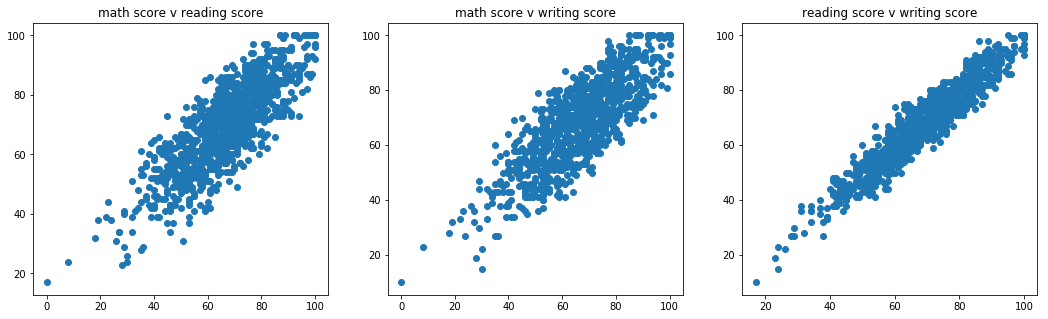

In [33]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("math score v reading score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("math score v writing score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("reading score v writing score")

plt.show()

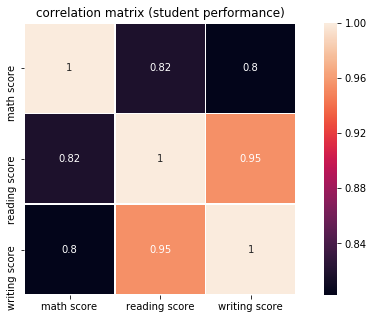

In [35]:
corrmat_student = student_df.corr()

plt.figure(figsize=(10,5))

# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

Reading score and writing score